## Kaggle Workloads Run-time Experiment
In this notebook, we make the plot in Figure 4 (d) of Section 6.2

Experiment result is located here:

'./experiment_results/remote/execution_time/different_workloads/kaggle_home_credit/cloud-41/2019-10-18/00-22.csv'


In [1]:
# numpy and pandas for data manipulation
import sys
# Suppress warnings
import warnings
import seaborn as sns
import matplotlib as plt
import networkx as nx
import numpy as np
import matplotlib.ticker as ticker
import pandas as pd
import os
import matplotlib2tikz
plt.style.use('seaborn')
sns.set(style="whitegrid")
sns.set_style({'grid.color': '.5'})
sns.set_context("paper", rc={"lines.markersize": 15})
plt.rc('hatch', color='white', linewidth=4)

plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    "text.usetex": True,   
    "font.family": "serif",
    "font.serif": [],
    "font.sans-serif": [],
    "font.monospace": [],
    "axes.labelsize": 25,     
    "font.size": 25,
    "legend.fontsize": 25, 
    "xtick.labelsize": 25,
    "ytick.labelsize": 25,
    #"figure.figsize": figsize(1.0), 
     "pgf.preamble": [
        r"\usepackage[utf8x]{inputenc}",    # use utf8 fonts becasue your computer can handle it :)
        r"\usepackage[T1]{fontenc}",        # plots will be generated using this preamble
        ]
})

warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline
ROOT_RESULT_FOLDER = '/Users/bede01/Documents/work/phd-papers/ml-workload-optimization/experiment_results/remote/'


SYSTEM_COLOR = sns.color_palette()[0]
BASELINE_COLOR = sns.color_palette()[1]

WRITE_DIRECTORY_ROOT = \
'/Users/bede01/Documents/work/phd-papers/ml-workload-optimization/papers/images/experiment-results/'

output_directory = WRITE_DIRECTORY_ROOT + 'kaggle_home_credit/execution_time'
def create_folder(path):
    if not os.path.exists(os.path.dirname(path)):
        try:
            os.makedirs(os.path.dirname(path))
        except OSError as exc:  # Guard against race condition
            if exc.errno != errno.EEXIST:
                raise

In [6]:
TICK_LABEL_SIZE = 25
AXIS_FONT = 30

In [14]:
result_folder = ROOT_RESULT_FOLDER + '/execution_time/different_workloads/kaggle_home_credit/cloud-41'
IN_PAPER_RESULT_FILE = result_folder + '/2019-10-18/00-22.csv'
RESULT_FILE = result_folder + '/2020-01-31/12-49.csv'
#RESULT_FILE=IN_PAPER_RESULT_FILE

In [15]:
HEADERS = [
    'timestamp', 'exp_id', 'repo', 'workload', 'type', 'mat_rate', 'run_time'
]
execution_order = {
    'start_here_a_gentle_introduction': 1,
    'introduction_to_manual_feature_engineering': 2,
    'introduction_to_manual_feature_engineering_p2': 3,
    'fork_cridata_start_here_a_gentle_introduction': 4,
    'fork_taozhongxiao_start_here_a_gentle_introduction': 5,
    'fork_introduction_to_manual_feature_engineering': 6,
    'fork_introduction_to_manual_feature_engineering_p2': 7,
    'fork_join_start_here_intro': 8
}
method_map = {'optimized': 'CO', 'baseline': 'KG', 'helix':'HL'}

execution_times = pd.read_csv(RESULT_FILE, header=None, names=HEADERS)
execution_times['workload_order'] = execution_times['workload'].replace(
    execution_order)
#execution_times = execution_times[execution_times['workload_order'] > 0]
execution_times['cumulative_run_time'] = execution_times.groupby(
    ['exp_id', 'type'])['run_time'].apply(lambda x: x.cumsum())
execution_times['type'] = execution_times['type'].replace(method_map)
#execution_times['workload_order'] = execution_times['workload'].replace(execution_order)

In [16]:
def plot_executions_times(df, loc=None):
    plt.figure(figsize=(11,4))
    plot = sns.lineplot(
        data=df,
        x='workload_order',
        y='cumulative_run_time',
        hue='type',
        style='type',
        estimator='mean',
        err_kws={'elinewidth':3},

        markers={
            'CO': "o",
            'KG': "^",
            'HL': "v"
        },
        hue_order=['CO', 'KG', 'HL'],
        dashes={
            'CO': (1, 0),
            'KG': (4, 1),
            'HL': (2, 3)
        },
        lw=5,
        palette={
            'CO': SYSTEM_COLOR,
            'KG': BASELINE_COLOR,
            'HL': sns.color_palette()[2]
        },
        ci='sd',
        err_style='bars',
        legend='brief')
    lg = plt.legend(
        loc='upper center',
        handlelength=1.5,
        handletextpad=0.1,
        #fontsize=17,
        ncol=3,
        columnspacing=0.5,
        bbox_to_anchor=(0.55, 1.2))
    handles = lg.legendHandles
    labels = ['CO', 'KG','HL']
    del handles[0]
    from matplotlib.lines import Line2D
    handles[0] = Line2D([0], [1],
                        color=SYSTEM_COLOR,
                        linewidth=4,
                        dashes=(1, 0),
                        marker="o")
    
    handles[1] = Line2D([0], [1],
                        color=BASELINE_COLOR,
                        linewidth=4,
                        dashes=(4, 1),
                        marker="^")
    
    handles[2] = Line2D([0], [1],
                        color=sns.color_palette()[2],
                        linewidth=4,
                        dashes=(2, 3),
                        marker="v")
    
    legend = plt.legend(
        handles,
        labels,
        loc='upper center',
        handlelength=2,
        handletextpad=0.1,
        #fontsize=TICK_LABEL_SIZE,
        numpoints=1,
        ncol=3,
        columnspacing=0.5,
        bbox_to_anchor=(0.5, 1.1))
    
    for line in legend.get_lines():
        line.set_linewidth(3.0)
    plot.set_xlabel('Workload')
    plot.set_ylabel('Cumulative \nRun Time (s)')
    plot.set_yticks([0, 500, 1000, 1500, 2000])
    #plt.tick_params(labelsize=TICK_LABEL_SIZE)
    plot.set_xticks(range(1,9))
    plot.set_xticklabels(range(1,9))
    plot.yaxis.set_major_formatter(ticker.EngFormatter(sep=''))
    if loc is not None:
        plt.savefig(loc, bbox_inches ='tight')

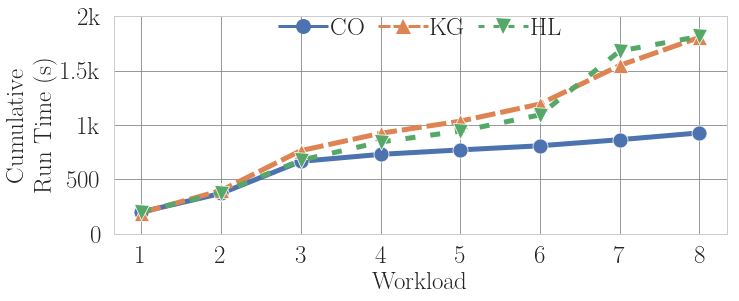

In [17]:
#plot_executions_times(execution_times, output_directory+'/different_workloads.pgf')
plot_executions_times(execution_times)

In [24]:
execution_times.groupby(['workload_order','type']).mean()

mat_rate    run_time  cumulative_run_time
workload_order type                                             
1              CO    16777216.0  202.440244           202.440244
               HL    16777216.0  202.503870           202.503870
               KG           0.0  196.359103           196.359103
2              CO    16777216.0  172.670477           375.110721
               HL    16777216.0  172.585722           375.089592
               KG           0.0  208.176527           404.535630
3              CO    16777216.0  301.233163           676.343884
               HL    16777216.0  301.829599           676.919191
               KG           0.0  369.571468           774.107098
4              CO    16777216.0  161.239082           837.582966
               HL    16777216.0  159.565695           836.484886
               KG           0.0  160.941043           935.048142
5              CO    16777216.0   39.701799           877.284764
               HL    16777216.0  103.250238           939.735124
               KG           0.0  113.798116          1048.846258
6              CO    16777216.0   35.390534           912.675299
               HL    16777216.0  149.608451          1089.343575
               KG           0.0  159.900960          1208.747218
7              CO    16777216.0   61.686923           974.362222
               KG           0.0  357.371324          1566.118542
8              CO    16777216.0   63.907055          1038.269277
               KG           0.0  259.694029          1825.812570

In [35]:
KG = 1806.109339
CO = 927.507535
print 'improvement: {}'.format((KG - CO)/KG)

improvement: 0.486461027042
